In [1]:
import os

os.chdir("../../")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_handling import ingestion

sns.set_theme(context="paper", font_scale=2.0, style="whitegrid")

In [2]:
ncg_prices, gaspool_prices, the_prices = ingestion.read_imbalance_prices()
natural_gas_prices = pd.concat([(ncg_prices + gaspool_prices).dropna() / 2, the_prices]).sort_index()

electricity_prices = ingestion.read_electricity_prices()
crude_oil_prices = ingestion.read_crude_oil_prices()

In [3]:
price_comparison = pd.concat(
    [
        natural_gas_prices,
        electricity_prices,
        crude_oil_prices,
    ],
    axis=1,
    keys=["Natural gas", "Electricity", "Crude oil"],
)

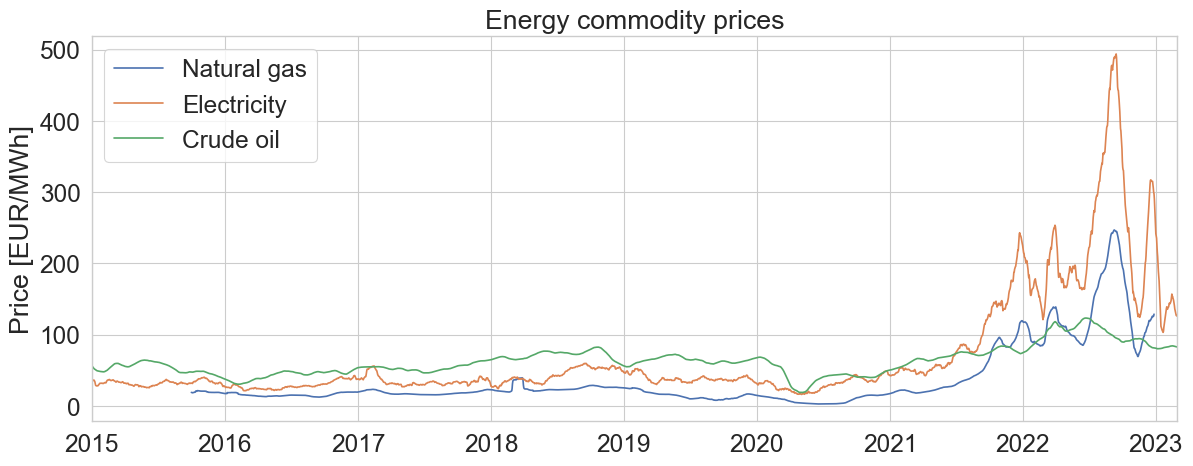

In [4]:
fig, ax = plt.subplots(figsize=(14, 5))

price_comparison.rolling(window='30d').mean().plot(ax=ax)

ax.set_ylabel("Price [EUR/MWh]")
ax.set_title("Energy commodity prices")

# Save plot
fig.savefig("diagrams/data_analysis_006_001.svg", format="svg", bbox_inches="tight")

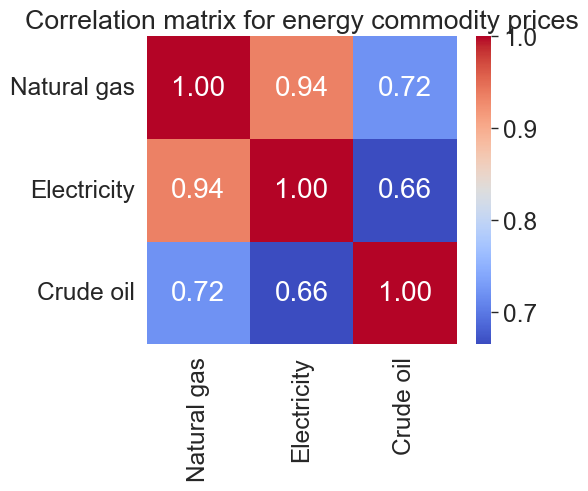

In [6]:
fig, ax = plt.subplots(figsize=(5, 4))

sns.heatmap(
    price_comparison.corr(),
    ax=ax,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"fontsize": 20},
)

plt.title("Correlation matrix for energy commodity prices")

# Save plot
fig.savefig("diagrams/data_analysis_006_002.svg", format="svg", bbox_inches="tight")